### Step 1: Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For clean visuals
sns.set(style='whitegrid')

### Step 2: Load the Dataset

In [37]:
# Load the CSV file
df = pd.read_csv('../datasets/postings.csv')

# Display the shape of the dataset (rows, columns)
print(f"\nDataset shape: {df.shape}")

# Display column names
print("\n\nColumn names:", df.columns.tolist())

# Understand column types (categorical, numerical, etc.)
print("\n\nColumn types:")
df.info()

# Check missing values
print("\n\nMissing values in each column:")
df.isnull().sum().sort_values(ascending=False)




Dataset shape: (123849, 31)


Column names: ['job_id', 'company_name', 'title', 'description', 'max_salary', 'pay_period', 'location', 'company_id', 'views', 'med_salary', 'min_salary', 'formatted_work_type', 'applies', 'original_listed_time', 'remote_allowed', 'job_posting_url', 'application_url', 'application_type', 'expiry', 'closed_time', 'formatted_experience_level', 'skills_desc', 'listed_time', 'posting_domain', 'sponsored', 'work_type', 'currency', 'compensation_type', 'normalized_salary', 'zip_code', 'fips']


Column types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123849 entries, 0 to 123848
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   job_id                      123849 non-null  int64  
 1   company_name                122130 non-null  object 
 2   title                       123849 non-null  object 
 3   description                 123842 non-null  object 
 

closed_time                   122776
skills_desc                   121410
med_salary                    117569
remote_allowed                108603
applies                       100529
max_salary                     94056
min_salary                     94056
currency                       87776
compensation_type              87776
normalized_salary              87776
pay_period                     87776
posting_domain                 39968
application_url                36665
formatted_experience_level     29409
fips                           27415
zip_code                       20872
company_name                    1719
company_id                      1717
views                           1689
description                        7
work_type                          0
sponsored                          0
job_id                             0
listed_time                        0
expiry                             0
application_type                   0
original_listed_time               0
f

In [38]:
# Step 1: Load the CSV file
df = pd.read_csv('../datasets/postings.csv')

# --------------------------------------
# Step 2: Filter for Full-Time, Yearly Jobs with Salary
# --------------------------------------
# Keep only full-time and yearly-compensated jobs
df = df[(df['work_type'] == 'FULL_TIME') & (df['pay_period'] == 'YEARLY')]

# Remove rows with missing or zero normalized salary
df = df[df['normalized_salary'].notnull() & (df['normalized_salary'] > 0)]

# Drop rows with missing key categorical info
df = df.dropna(subset=['company_name', 'title', 'location', 'formatted_experience_level'])

# --------------------------------------
# Step 3: Select Relevant Columns
# --------------------------------------
selected_cols = [
    'company_name', 'title', 'location', 'formatted_experience_level',
    'views', 'applies', 'remote_allowed', 'normalized_salary'
]
df = df[selected_cols]

# --------------------------------------
# Step 4: Handle Missing Values
# --------------------------------------

# Fill missing remote_allowed with 0 (assume not remote)
df['remote_allowed'] = df['remote_allowed'].fillna(0)

# Fill missing views/applies with 0 (assume no engagement)
df['views'] = df['views'].fillna(0)
df['applies'] = df['applies'].fillna(0)

# Final shape
print(f"Final dataset shape: {df.shape}")

# Print first few rows to verify
print("\n\nFirst few rows of cleaned dataset:")
print(df.head())

Final dataset shape: (14877, 8)


First few rows of cleaned dataset:
                      company_name                                      title  \
101                   ActOne Group          Administrative Assistant - CONCUR   
109           ABC Farigua Division            Customer Service Representative   
195                Dexterity, Inc.                 Senior Mechanical Engineer   
221                      Ascendion               Quality Assurance Specialist   
244  Premier Brands Group Holdings  Technical Designer, Womans Denim Bottoms    

                            location formatted_experience_level  views  \
101                     New York, NY                  Associate    1.0   
109              Greater Orlando, FL                Entry level    6.0   
195                 Redwood City, CA           Mid-Senior level    3.0   
221                      Seattle, WA                  Associate    8.0   
244  New York City Metropolitan Area           Mid-Senior level   10.0   



Descriptive Statistics:
        company_name              title       location  \
count         14877              14877          14877   
unique         5213              10709           2341   
top           Jobot  Senior Accountant  United States   
freq            155                101           1315   
mean            NaN                NaN            NaN   
std             NaN                NaN            NaN   
min             NaN                NaN            NaN   
25%             NaN                NaN            NaN   
50%             NaN                NaN            NaN   
75%             NaN                NaN            NaN   
max             NaN                NaN            NaN   

       formatted_experience_level         views       applies  remote_allowed  \
count                       14877  14877.000000  14877.000000    14877.000000   
unique                          6           NaN           NaN             NaN   
top              Mid-Senior level           Na

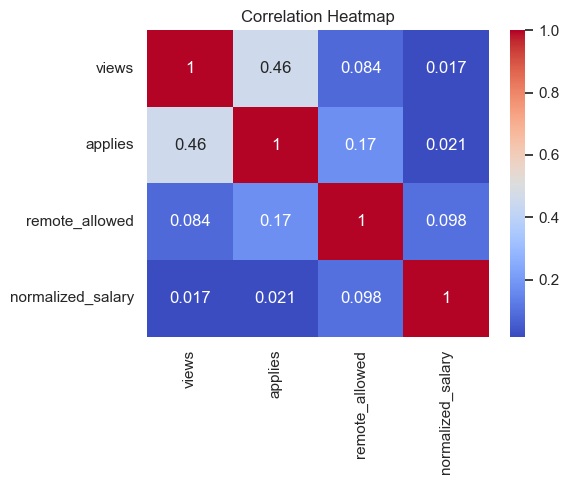

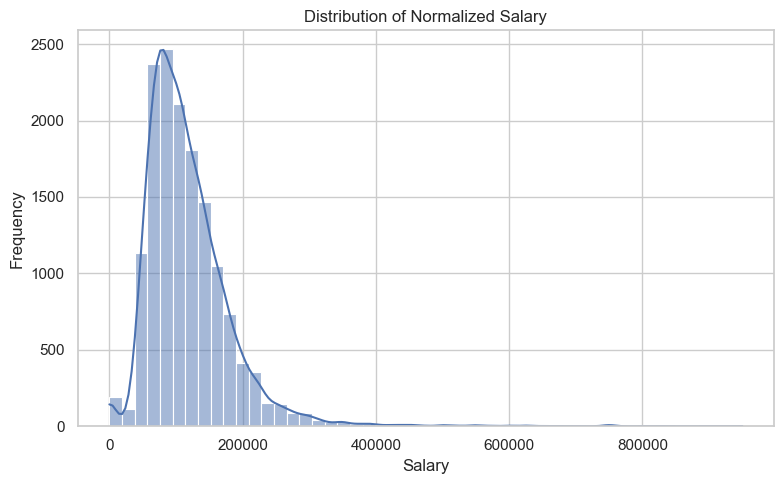

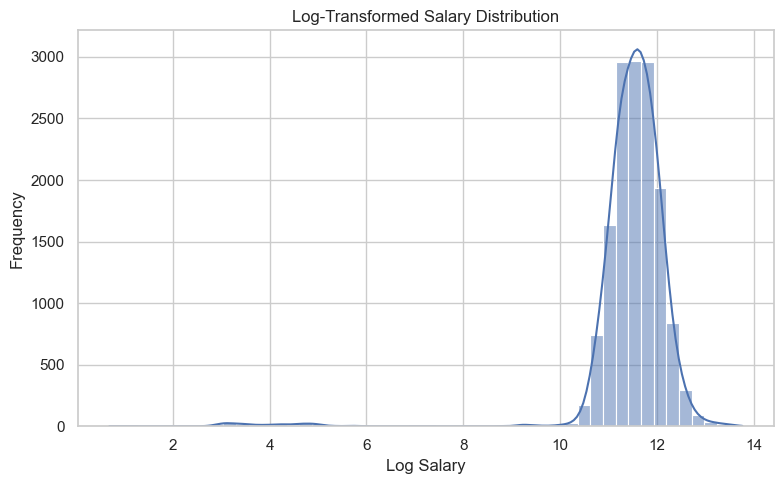

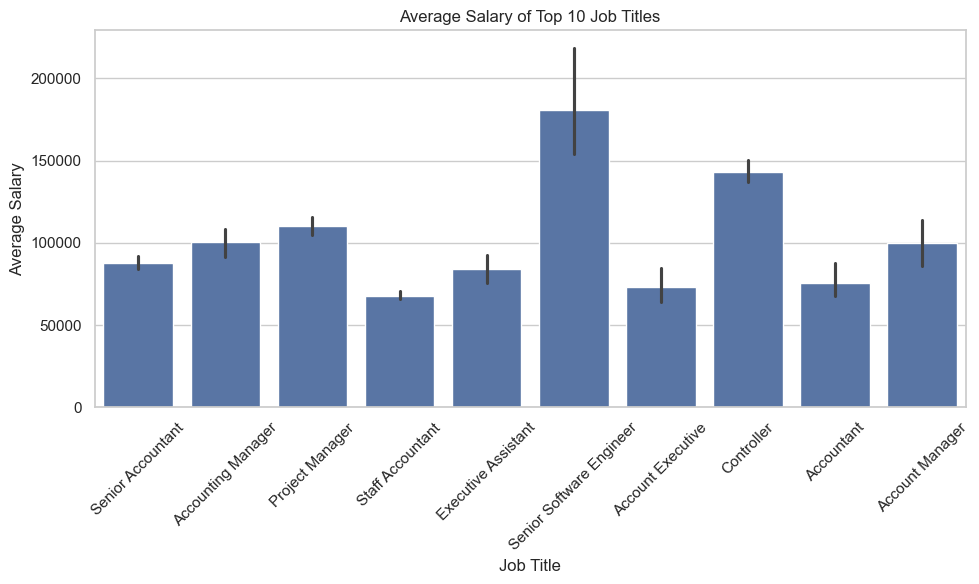

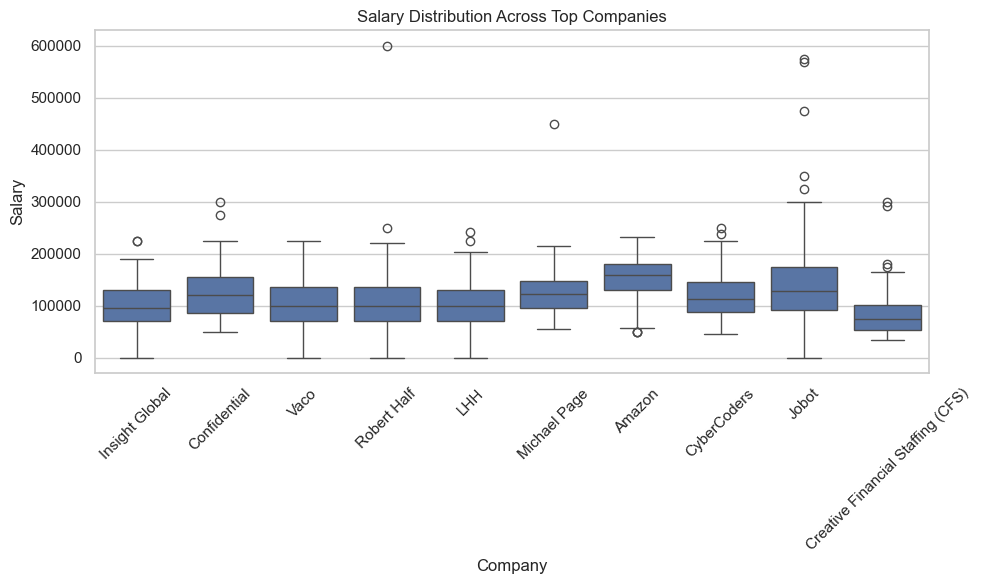

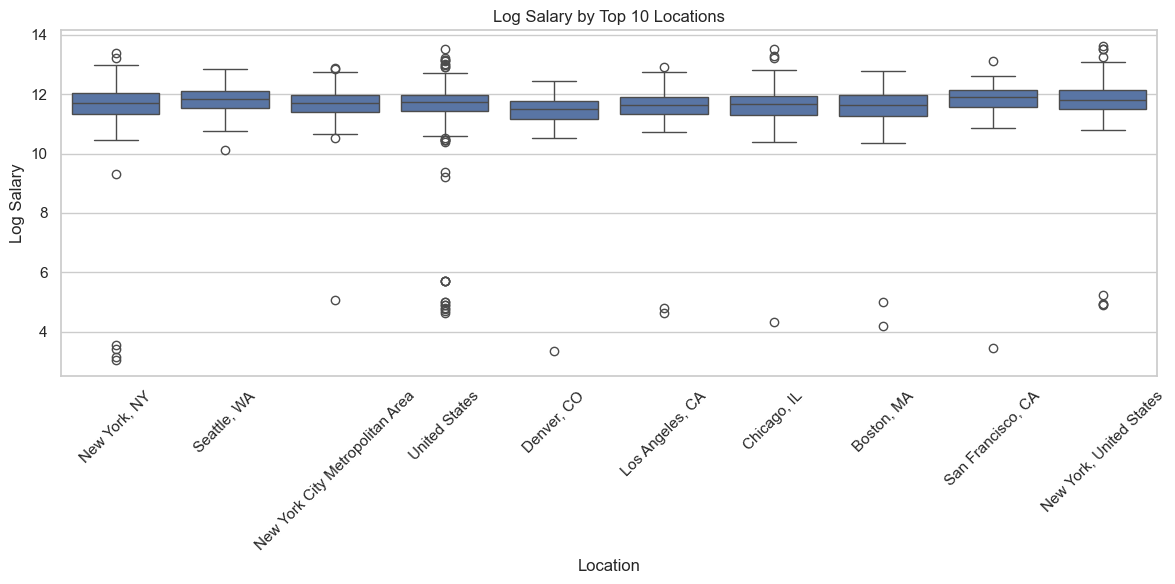

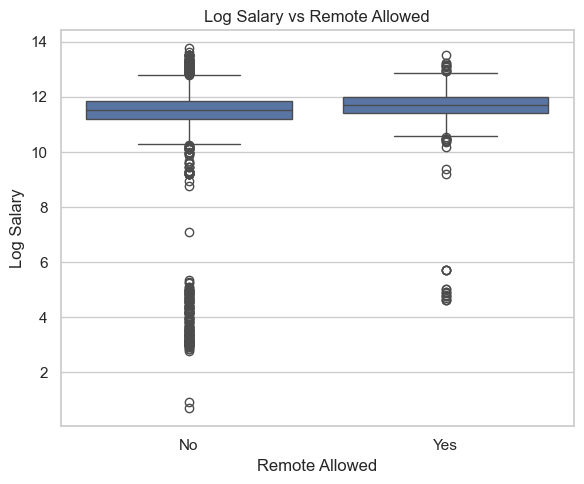

In [39]:
# --------------------------------------
# Step 5: Descriptive Stats
# --------------------------------------
print("\nDescriptive Statistics:\n", df.describe(include='all'))

# --------------------------------------
# Step 6: Correlation Heatmap (Numeric Features Only)
# --------------------------------------
plt.figure(figsize=(6, 5))
sns.heatmap(
    df[['views', 'applies', 'remote_allowed', 'normalized_salary']].corr(),
    annot=True, cmap='coolwarm'
)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# --------------------------------------
# Step 7: Salary Distribution (Raw + Log)
# --------------------------------------

# Histogram of original salary (highly skewed)
# plot is heavily right skewed
# violates assumptions of linear regression, which expects a roughly normal (bell-shaped) distribution of the target variable.
plt.figure(figsize=(8, 5))
sns.histplot(df['normalized_salary'], bins=50, kde=True)
plt.title('Distribution of Normalized Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Add log-transformed salary (log1p to handle 0s safely if any remain)
# Looks much more normal (bell-shaped)
# Log transformation is a common technique to reduce skewness in data.
# It compresses the range of values, making it easier to model relationships.
# Reduces the influence of extreme outliers
# Helps meet assumptions for linear regression
df['log_salary'] = np.log1p(df['normalized_salary'])

# Histogram of log-transformed salary (more normal)
plt.figure(figsize=(8, 5))
sns.histplot(df['log_salary'], bins=50, kde=True)
plt.title('Log-Transformed Salary Distribution')
plt.xlabel('Log Salary')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# --------------------------------------
# Step 8: Exploratory Visualizations
# --------------------------------------

# Average Salary by Top 10 Job Titles
top_titles = df['title'].value_counts().head(10).index
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df[df['title'].isin(top_titles)],
    x='title', y='normalized_salary', estimator=np.mean
)
plt.xticks(rotation=45)
plt.title("Average Salary of Top 10 Job Titles")
plt.ylabel("Average Salary")
plt.xlabel("Job Title")
plt.tight_layout()
plt.show()

# Salary Distribution Across Top Companies (Boxplot)
top_companies = df['company_name'].value_counts().head(10).index
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[df['company_name'].isin(top_companies)],
            x='company_name', y='normalized_salary')
plt.xticks(rotation=45)
plt.title("Salary Distribution Across Top Companies")
plt.ylabel("Salary")
plt.xlabel("Company")
plt.tight_layout()
plt.show()

# Log Salary by Top Locations (Boxplot)
top_locations = df['location'].value_counts().head(10).index
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df['location'].isin(top_locations)],
            x='location', y='log_salary')
plt.xticks(rotation=45)
plt.title('Log Salary by Top 10 Locations')
plt.xlabel('Location')
plt.ylabel('Log Salary')
plt.tight_layout()
plt.show()

# Remote vs Non-Remote Salary (Boxplot)
plt.figure(figsize=(6, 5))
sns.boxplot(x='remote_allowed', y='log_salary', data=df)
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Log Salary vs Remote Allowed')
plt.xlabel('Remote Allowed')
plt.ylabel('Log Salary')
plt.tight_layout()
plt.show()


Model Evaluation:
Mean Squared Error: 0.84
R^2 Score: 0.085


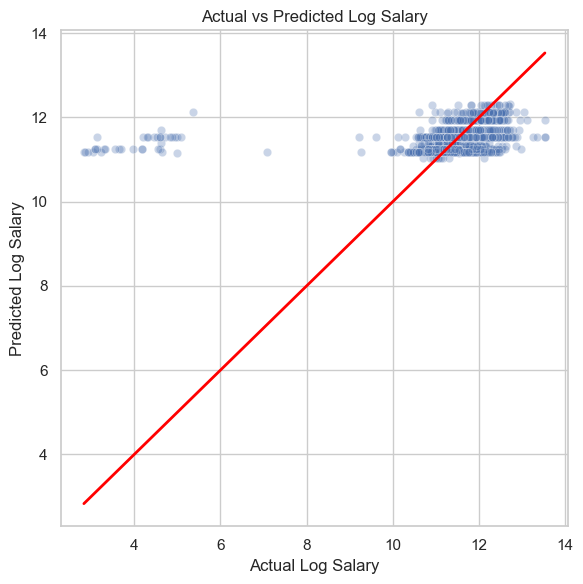

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 1: Log-transform the target to normalize it
df['log_salary'] = np.log1p(df['normalized_salary'])

# Step 2: Define features and target
features = ['views', 'applies', 'remote_allowed', 'formatted_experience_level']
target = 'log_salary'

X = df[features]
y = df[target]

# Step 3: Define column types for preprocessing
categorical_features = ['formatted_experience_level']
numerical_features = ['views', 'applies', 'remote_allowed']

# Step 4: Preprocessing pipelines
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

# Step 5: Create modeling pipeline with Linear Regression
linear_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Step 6: Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train the model
linear_model.fit(X_train, y_train)

# Step 8: Predict and evaluate
y_pred = linear_model.predict(X_test)

# Calculate Mean Squared Error (how far predictions are from actual values, on average)
mse = mean_squared_error(y_test, y_pred)
# Calculate R^2 score (explained variance — how much of the variation in y is explained by X)
r2 = r2_score(y_test, y_pred)


print("Model Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.3f}")

# Step 9: Plot Actual vs Predicted
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
plt.xlabel("Actual Log Salary")
plt.ylabel("Predicted Log Salary")
plt.title("Actual vs Predicted Log Salary")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.tight_layout()
plt.show()